# Financial Notebook

### Imports

In [10]:
# Michaela Webster's Thesis Project #
""" This project aims to try to predict the outcome of security clearance appeals cases """

#use this link for scikit learn help: https://www.ritchieng.com/pandas-scikit-learn/

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# imports
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import shlex
import sklearn
from sklearn import metrics as skmet

### Getting the Training Data

In [20]:
#open financial_query.csv as pandas dataframe - encoding must be latin-1
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\financial_query.csv"
data = pd.read_csv(path_to_file, encoding='latin-1')

df = data.groupby(['Financial', 'Denied']).size()
#print bar graph of financial yes/no vs denied yes/no
print (df)

Financial  Denied
False      False     4923
           True      4871
True       False     4729
           True      5991
dtype: int64


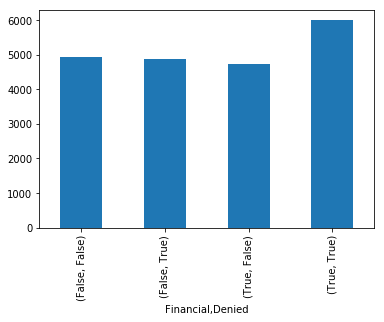

In [21]:
#print bar graph to show alcohol/denied
#cannot do this through cmd
df.plot.bar()

### Prime Data for Machine Learning

In [22]:
# set the featured columns for X (Financial)
feature_cols = ['Financial']
# you want all rows, and the feature_cols' columns
X = data.loc[:, feature_cols]
# now we want to create our response vector
y = data.Denied

### Feed the Data and Outcomes into LogisticRegression Model

In [23]:
# START DOING MACHINE LEARNING STUFF
# 1. import
from sklearn.linear_model import LogisticRegression
# 2. instantiate model
logreg = LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')
# 3. fit 
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=110, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
# FOR TEST DATA
#open financial_test.csv as pandas dataframe
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\financial_test.csv"
data2 = pd.read_csv(path_to_file, encoding='latin-1')
X_new = data.loc[:, feature_cols]
new_pred_class = logreg.predict(X_new)

In [25]:
new_pred_class

array([False,  True, False, ..., False, False,  True])

### Find Model Accuracy

In [26]:
financial_accuracy = skmet.accuracy_score(new_pred_class, y)

In [27]:
print('Accuracy Score for Financial model: ',financial_accuracy)

Accuracy Score for Financial model:  0.532026908452764


### Future Work

1. look into different types of data points to add